# Overview
In this lab, we will clean the data to prepare it for analysis. We will remove any trips with really long or really short durations.

| | |
| --------- | --------------------------- |
| Notebook  | 2b_DataCleansing.ipynb    |
| Builds On | 2_TripData.ipynb |
| Time to complete | 30 minutes


## Setup
Run the following cell to load the required libraries and data (same as previous lab).

<Axes: xlabel='duration', ylabel='Count'>

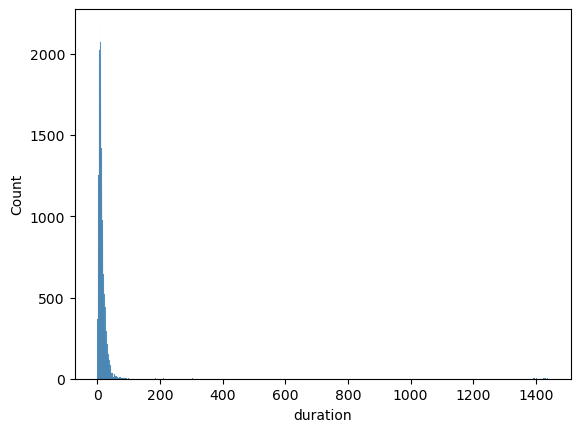

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_pickle('tripdata.pkl')
df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df.head()
sns.histplot(df['duration'])

## Step 1: Data Cleaning
You might notice from the plot that the graph has a really long tail on the right. This is because there are some really long trips.  If we look at the output of the `describe` method, we can see that the maximum trip time is 1439 minutes.  That's a long time.

In [2]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,64809.000000,64809,64809,59988.000000,64809.000000,64809.000000,59988.000000,64809.000000,64809.000000,64809.000000,64809.000000,64809.000000,64809.000000,0.0,64809.000000,64809.000000,59988.000000,59983.000000,59988.000000,64809.000000
mean,1.867920,2023-02-14 19:27:48.982888,2023-02-14 19:45:33.676680,1.136527,99.988273,139.065809,1.294792,13.696354,16.646276,0.844270,0.571364,2.153087,0.182798,NaN,0.952858,21.884576,1.369207,1.028558,0.733793,17.744897
min,1.000000,2008-12-31 23:02:29,2009-01-01 16:41:01,1.000000,1.000000,1.000000,0.000000,0.000000,-113.490000,-2.500000,-0.500000,-0.900000,-6.550000,NaN,-1.000000,-94.840000,1.000000,1.000000,-2.750000,0.000000
25%,2.000000,2023-02-07 22:34:54,2023-02-07 23:01:51,1.000000,74.000000,74.000000,1.000000,1.130000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.960000,1.000000,1.000000,0.000000,7.250000
50%,2.000000,2023-02-14 19:24:38,2023-02-14 19:40:34,1.000000,75.000000,138.000000,1.000000,1.890000,13.500000,0.000000,0.500000,1.720000,0.000000,NaN,1.000000,18.000000,1.000000,1.000000,0.000000,11.500000
75%,2.000000,2023-02-21 21:36:21,2023-02-21 21:52:19,1.000000,129.000000,219.000000,1.000000,3.350000,19.800000,1.000000,0.500000,3.350000,0.000000,NaN,1.000000,26.320000,2.000000,1.000000,2.750000,17.783333
max,2.000000,2023-03-01 00:01:06,2023-03-01 16:51:02,99.000000,265.000000,265.000000,9.000000,178919.980000,440.000000,12.700000,4.250000,80.000000,45.350000,NaN,1.000000,441.000000,4.000000,2.000000,2.750000,1439.633333
std,0.338581,NaN,NaN,1.132523,61.711800,76.378947,0.944409,931.311966,12.650412,1.280076,0.386753,2.846365,1.161675,NaN,0.198828,14.721413,0.510232,0.166562,1.216754,69.280970



Let's get rid of the outliers.  Trips shorter than one minute or longer than an hour are probably errors.  Let's remove them.


In [3]:
df = df[(df.duration > 1) & (df.duration < 60)]
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,62544.000000,62544,62544,57815.000000,62544.000000,62544.000000,57815.000000,62544.000000,62544.000000,62544.000000,62544.000000,62544.000000,62544.000000,0.0,62544.000000,62544.000000,57815.000000,57813.000000,57815.000000,62544.000000
mean,1.869100,2023-02-14 21:44:36.894314,2023-02-14 21:58:37.388270,1.083231,99.103431,138.848906,1.296861,13.987418,16.378636,0.861163,0.577881,2.169967,0.177529,NaN,0.958455,21.675748,1.358367,1.017141,0.755855,14.008233
min,1.000000,2023-01-25 19:32:54,2023-01-25 19:43:20,1.000000,1.000000,1.000000,0.000000,0.000000,-113.490000,-2.500000,-0.500000,0.000000,-6.550000,NaN,-1.000000,-94.840000,1.000000,1.000000,-2.750000,1.016667
25%,2.000000,2023-02-07 23:01:59,2023-02-07 23:14:12.500000,1.000000,74.000000,74.000000,1.000000,1.190000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.070000,1.000000,1.000000,0.000000,7.533333
50%,2.000000,2023-02-14 19:38:18.500000,2023-02-14 19:51:31,1.000000,75.000000,138.000000,1.000000,1.910000,13.500000,0.000000,0.500000,1.820000,0.000000,NaN,1.000000,18.050000,1.000000,1.000000,0.000000,11.666667
75%,2.000000,2023-02-21 22:30:49.500000,2023-02-21 22:42:56,1.000000,129.000000,218.000000,1.000000,3.390000,19.800000,1.000000,0.500000,3.400000,0.000000,NaN,1.000000,26.190000,2.000000,1.000000,2.750000,17.750000
max,2.000000,2023-03-01 00:01:06,2023-03-01 00:25:00,99.000000,265.000000,265.000000,6.000000,178919.980000,188.500000,12.700000,1.500000,80.000000,45.350000,NaN,1.000000,222.540000,4.000000,2.000000,2.750000,59.983333
std,0.337293,NaN,NaN,0.796539,60.991712,76.157707,0.947966,947.693174,11.048449,1.285798,0.379472,2.773991,1.121984,NaN,0.178248,13.279079,0.495107,0.129800,1.228143,9.311493


Let's plot the data again to see if the outliers are gone.

<Axes: xlabel='duration', ylabel='Count'>

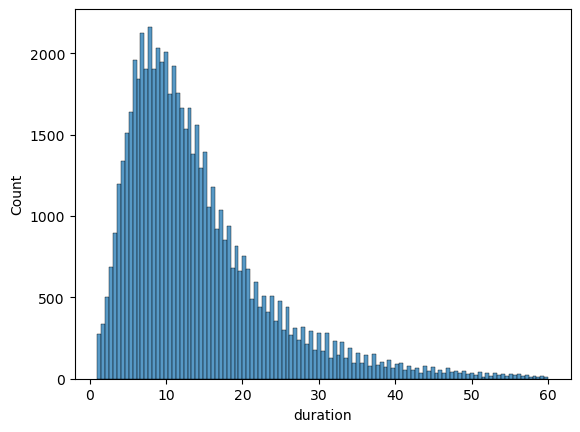

In [4]:
sns.histplot(df['duration'])

That looks better.  The data is still skewed, but it's not as extreme as before.  We could try to normalize the data, but for now, let's leave it as is.